## Machine Learning and Artificial Intelligence 
Summer High School Academic Program for Engineers (2025)
## 2 - Linear Models and Perceptrons

**Author:** <a href="https://www.cs.columbia.edu/~bauer">Daniel Bauer &lt;bauer@cs.columbia.edu&gt;</a>

In this section, we will look at one of the simplest form of machine learning models: Linear regression and linear classifiers. In the process, we will discover the concept of an **error function** and the idea to minimize this function incrementally. 


## Biological Neurons

In humans and other animals behavior is controlled by the nervous system. The nervous system, including the brain, is based on connections between nerve cells, called **neurons**. Learning involves strengthening or weakening the connections between neurons, or establishing new connections.

Artificial neural networks, the foundation of most modern machine learning approaches, are based on an a mathematical abstraction of biological neurons. We will develop this abstraction more fully, starting with simple linear models known as perceptrons. 

It is helpful to first understand the foundations of biological neurons and how learning in biological neural networks works.
Neurons communicate with each other using electrochemical signals, triggered by electrical voltage changes in the cell. The connections between neurons are called **synapses**. 

A neuron generally consists of three main structures, the cell body (also called **soma**), an **axon**, and **dendrites**. The soma powers the neuron's function by providing energy (in the form of ATP produced by the mitochondria) and proteins. The dendrites pick up electrochemical signals from the axons of other neurons. These signals can be either **excitatory** or **inhibitory** on the voltage measured between the neuron's interior and its exterior. Conceptually, the effect of these signals are summed together. If the total voltage exceeds a certain threshold, the neuron triggers an **action potential**, a spike in voltage. This is accomplished through voltage gated sodium channels in the neuron's membrane, which open to allow the influx of a large number of positively charged sodium ion (Na+). 

The action potential travels down the axon to the synapses -- the points where the axon connects to other neurons. In the synapse, the action potential causes the release of chemical neurotransmitters into the synaptic cleft (the space between the axon and the dendrites of other neurons). These neurotransmitters bind to specific receptors in the other neuron's dendrite, which produce the excitatory or inhibitory effect on that neuron. 

In reality, biological neurons are a lot more complicated. For example some lack dendrites (axons may connect directly to the soma) or axons. There are many different types of neurotransmitters, and an excess or lack may have effects on perception, cognition, and memory. When the action potential propagates through the axon, the charge "jumps" between locations on axon called Node of Ranvier. Except at these nodes, the axon is insulated by a fatty substance called a myelin sheath. In multiple sclerosis patients, the immune system mistakenly attacks the myelin sheath, which results in symptoms such as impaired muscle control, speech problems, or pain. 

<img src="https://github.com/daniel-bauer/shape-ml-ai/blob/main/images/neuron_cell.png?raw=true" width=600px>

## Artificial Neurons, Linear Models

Artificial neurons (sometimes called units or nodes), are by contrast much simpler.

<img src="https://github.com/daniel-bauer/shape-ml-ai/blob/main/images/basic_nn_unit.png?raw=true" width=240px>


Each component of the input is multiplied with a specific weight. These weights can be positive (excitatory) or negative (inhibitory). Then each of the products is added together in a weighted sum, or **linear combination** of the inputs. A **bias weight** is added to the sum. We can think of the bias as an additional input with value 1. For example, if there are $d$ input attributes, this weighted sum is: 

$x_{[0]} w_{[0]} + x_{[1]} w_{[1]} + \cdots + x_{[d-1]} w_{[d-1]} + b$ 
$= (\sum\limits_{i=0}^{d-1} x_i w_i) + b$

When we look at the input $\bf{x}$ and the weights $\bf{w}$ as vectors, the weighted sum is the **dot product**: $\bf{x} \cdot \bf{w}$. To incorporate the bias weight, we can an additional 1 element to the vector $\mathbf{x}$ and include the bias in the weight vector $\bf{w}$.

The weights and bias are the **parameters** of the model and are adjusted during training. 

The result of the weighted summation is passed through an **activation function**. The easiest one of these is the linear function $f(x) = x$. Later, we will see a variety of different activation functions for different purposes.


With a single input plus bias weight, the parameters of the model define a $d$ dimensional hyperplane in $d+1$ dimensional space. For example, if $\mathbf{w}=(2,)$ and $b=5$, the model defines a straight line in 2 dimensional space. You may be familiar with this idea. $w_{[0]}$ is also called the the slope of the line, and $b$ is called the intercept, because this is where the line crosses the $y$ axis.

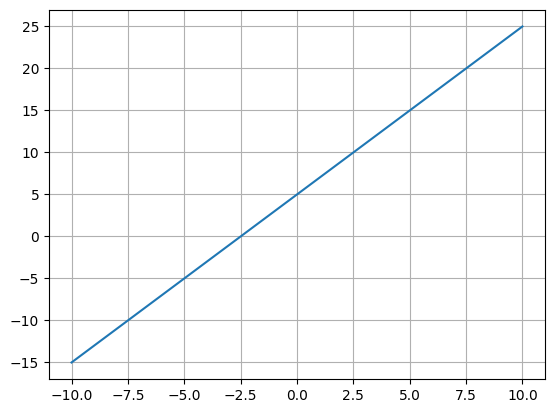

In [3]:
# don't worry about this code for now, it's just here to show a visualization
import numpy as np  
from matplotlib import pyplot as plt 
w = [2]
b = 5

x = np.linspace(-10,10,1000)
out = x * w[0] + b
plt.grid()
plt.plot(x, out)

Two weights plus bias define a plane in 3D space. 

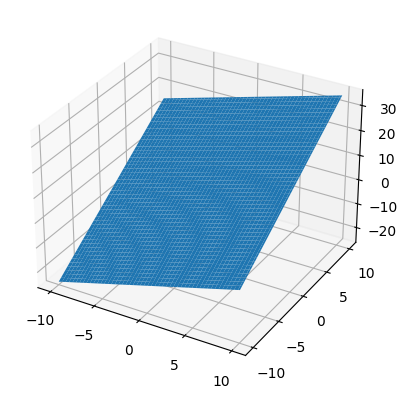

In [4]:
from mpl_toolkits.mplot3d import Axes3D

w = [1,2]
b = 5

tmp = np.linspace(-10, 10, 100)
x, y = np.meshgrid(tmp, tmp)
z = (w[0] * x + w[1] *y + b)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, z)

The linear model can be used for regression, i.e. given an input vector $\bf{x}$ predict an output value.

### Perceptrons
Linear models can also be used for binary classification. If the weighted sum exceeds a threshold, the model outputs 1, otherwise it outputs -1. This is similar to the action potential in biological neurons. This is the idea behind the **perceptron**, a classic machine learning algorithm. 

The idea is to use the **step function** as the activation function, which looks like this: 

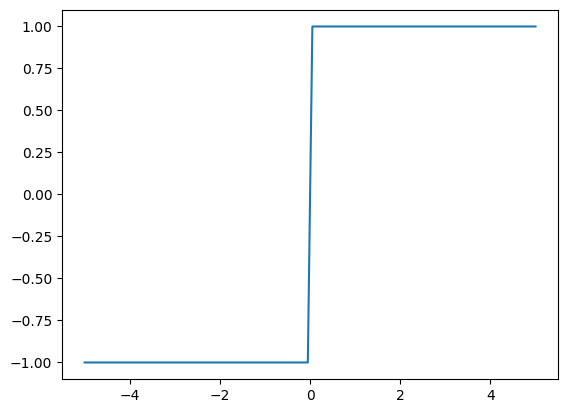

In [5]:
def step(x): 
    return 1 if x > 0 else -1

x_vals = np.linspace(-5,5,100)
y_vals = [step(x) for x in x_vals]

plt.plot(x_vals, y_vals)

Note, that the effect of the bias weight is to shift the threshold up or down, because the bias is just added to the weighted sum. 

The prediction of the linear classifier can be compactly described as: 

$$\left\{ \begin{array}{ll} +1 & \text{if } (\sum\limits_{i=0}^{d-1} x_i w_i) + b > 0 \\ -1 & \text{ otherwise }.\end{array} \right.$$

or 
$sign(\sum\limits_{i=0}^{d-1} x_i w_i) + b) = sign(\mathbf{w \cdot x} +b)$

**Separation Boundary**

The perceptron separates the data into 2 classes: inputs for which the model outputs -1 and inputs for which it outputs +1. The **separation boundary** is the straight line (or hyperplane) that separates the data in this way. Inputs that lie directly on the separation boundary have the weighted sum 0. Therefore, the separation boundary can be described as:

$$(\sum\limits_{i=0}^{d-1} x_i w_i) + b = 0$$

**Example:** To illustrate binary classification with linear models, consider the following data. 

In [6]:
x = np.array([[1,3],[7,4],[7,6],[2,6],[3,2]])
x

array([[1, 3],
       [7, 4],
       [7, 6],
       [2, 6],
       [3, 2]])

In [7]:
y = np.array([1, -1, 1, 1, -1])
y

array([ 1, -1,  1,  1, -1])

We can plot the data like this: 

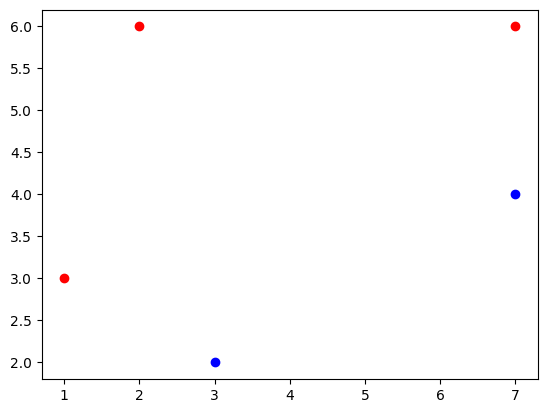

In [8]:
class1 = np.array([x[i] for i in range(len(x)) if y[i] == 1])
class2 = np.array([x[i] for i in range(len(x)) if y[i] == -1])

plt.scatter(class1[:,0], class1[:,1], color = 'red')
plt.scatter(class2[:,0], class2[:,1], color = 'blue')

If the data is linearly separable in 2D, as in this case, it's easy to find a separation boundary by hand. In this case, maybe 1/2 * x + 2 will do?

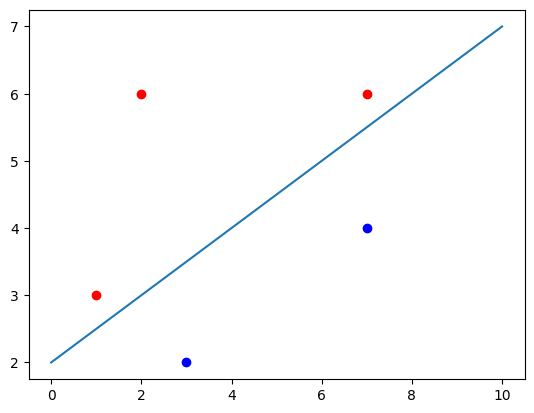

In [9]:
plt.scatter(class1[:,0], class1[:,1], color = 'red')
plt.scatter(class2[:,0], class2[:,1], color = 'blue')

x = np.linspace(0,10,1000)
out = x * 1/2 + 2
plt.plot(x, out)

The line is defined as x2 = 1/2 * x1 + 2. 

Rearrange to 1/2 * x1 - 1 * x2 + 2 = 0 

The corresponding weight vector is $\mathbf{w} = (1/2,-1)$ and $b = 2$.


***Perceptron Learning***

But how do we find a separation line (or hyperplane) automatically? The perceptron learning algorithm is a simple iterative approach. If the data is linearly separably (that is, there is some hyperplane that correctly separates the two classes) the perceptron learning algorithm is guaranteed to find it. 

The algorithm starts with an arbitrary set of weights. It then iterates over each training example. If the example is classified correctly, nothing changes. If the prediction is incorrect, the weights are updated using the **update rule**. 

$$ \mathbf{w}[i]_{new} \leftarrow  \mathbf{w}[i] + \eta~y \cdot \mathbf{x}[i]$$
and
$$ b \leftarrow b + \eta~y$$

where $\mathbf{x}[i]$ and $\mathbf{w}[i]$ are the i'th element of the input vector and the weight vector, respectively, and $y$ is the target output. $\eta$ is the learning rate, which is typically set $0 < \eta \leq 1$.

Note that the bias weight $b$ is treated like any other weight, but with constant input 1.

It is important to remember that all weight updates happen in parallel if an example is misclassified (i.e. for each $i$). 

After a finite number of iterations, the algorithm will **converge**, i.e. every training example is classified correctly. 

Here is the algorithm in pseudocode: 
```
Initialize the weight vector to an arbitrary value. 

While not converged: 

   for each training example (x, y):
       Compute the output: y_pred = sign(w · x + b)
    
   if y_pred != y:
        # update weights and bias
        for each weight i: 
            w[i] = w[i] + η * y * x[i]
        b = b + η * y
```